In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder , PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


data_= pd.read_csv('kepler_dataset.csv')

data_=data_.drop(columns=['DispositionScore','RA_decimaldegrees','Dec_decimaldegrees', 'Kepler-band_mag', 'ExoplanetCandidate','TCEPlanetNumbe'])

data=data_.loc[:,:].copy()

data_nan=data.dropna()

mapping={0:0 ,1:0 ,2:1}
data_nan['ExoplanetConfirmed']=data_nan['ExoplanetConfirmed'].map(mapping)

X=data_nan.drop(columns=['ExoplanetConfirmed'])
y=data_nan['ExoplanetConfirmed']

scaler=StandardScaler()
X=scaler.fit_transform(X)

x_train,x_,y_train,y_=train_test_split(X,y,test_size=0.4,random_state=42)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.5,random_state=42)



C:\Users\Harsh Panchal\AppData\Local\Temp\ipykernel_4192\1368741986.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nan['ExoplanetConfirmed']=data_nan['ExoplanetConfirmed'].map(mapping)


In [2]:

model=Sequential(
    [
        Dense(128,activation='relu',kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(64,activation='relu',kernel_regularizer=l2(0.001)),
        BatchNormalization(),    
        Dropout(0.5),
        
        Dense(32,activation='relu',kernel_regularizer=l2(0.001)),
        BatchNormalization(),    
        Dropout(0.5),
        
        Dense(1,activation='linear')

    ]
)   
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)
history=model.fit(
    x_train,y_train,
    epochs=100,
    validation_data=(x_cv,y_cv)
)
    






Epoch 1/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6235 - loss: 1.0031 - val_accuracy: 0.7571 - val_loss: 0.7152
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7477 - loss: 0.7616 - val_accuracy: 0.8036 - val_loss: 0.6511
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7702 - loss: 0.6682 - val_accuracy: 0.8143 - val_loss: 0.6042
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7825 - loss: 0.6270 - val_accuracy: 0.8171 - val_loss: 0.5733
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8048 - loss: 0.6012 - val_accuracy: 0.8214 - val_loss: 0.5519
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7981 - loss: 0.5782 - val_accuracy: 0.8257 - val_loss: 0.5317
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8154 - loss: 0.5329 - val_accuracy: 0.8214 - val_loss: 0.5241
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8193 - loss: 0.5403 - val_accu

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step


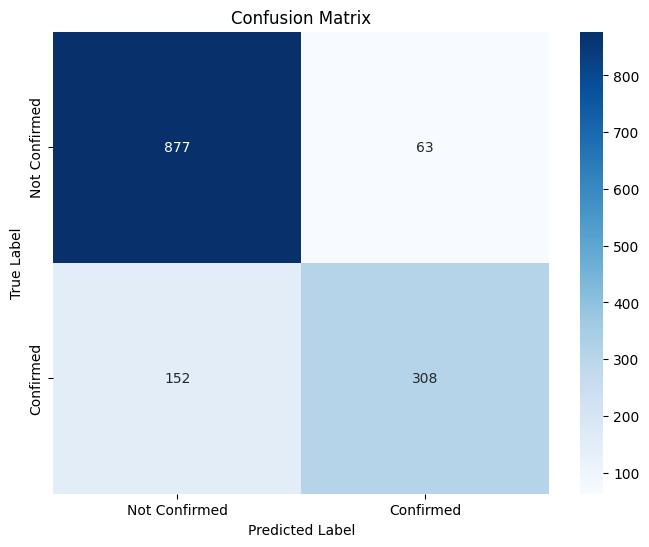

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       940
           1       0.83      0.67      0.74       460

    accuracy                           0.85      1400
   macro avg       0.84      0.80      0.82      1400
weighted avg       0.85      0.85      0.84      1400



In [4]:
import matplotlib.pyplot as plt
# Predict on test data
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Confirmed', 'Confirmed'], yticklabels=['Not Confirmed', 'Confirmed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

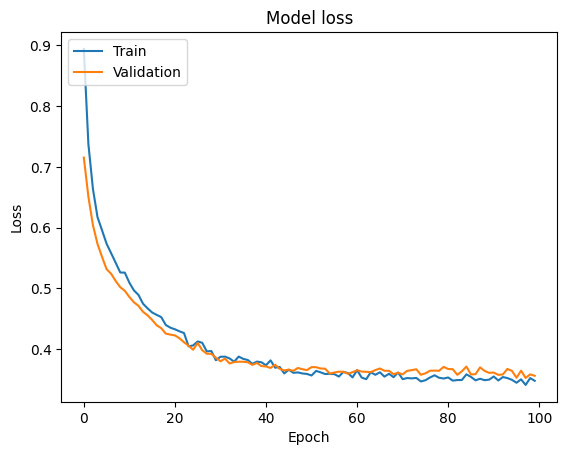

In [5]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



In [8]:
# Evaluate the model on test data
loss,accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.8404 - loss: 0.3530
Test Accuracy: 84.64%
